In [263]:
%reload_ext autoreload
%autoreload 2
import numpy as np
import matplotlib.pyplot as plt
from bpca import BPCA
from vis_utils import *

## Toy Example

In [248]:
cov = np.diag(np.array([6,5,4,3,1,1,1,1,1,1])**2)
data = np.random.multivariate_normal(np.zeros(10), cov, size=500)
bpca = BPCA()
bpca.fit(data, iters=1000, verbose=True, trace_loglikelihood=True)

Iter 0, LL: -299121.358842, alpha: [ 4.99350616  3.52288064 17.75725527  8.65953815 19.26622527 22.76965027
  5.33057677  4.89227378  6.43067619]
Iter 100, LL: -9963.894172, alpha: [173.48371821   0.37631516   0.84608177   0.48672293 173.48371242
   0.96692054 173.50881203   1.52998492   3.98590449]
Iter 200, LL: -9968.984668, alpha: [211.32977179   0.33496114   0.65305708   0.42756547 211.32977179
   0.85281993 211.32977179 211.32977181 211.32977179]
Iter 300, LL: -9984.008778, alpha: [218.26970082   0.32612944   0.68369484   0.42263835 218.26970082
   0.85435199 218.26970082 218.26970082 218.26970082]
Iter 400, LL: -9971.653453, alpha: [215.64641301   0.32791698   0.70493797   0.41204889 215.64641301
   0.86984177 215.64641301 215.64641301 215.64641301]
Iter 500, LL: -9977.837139, alpha: [211.39411645   0.32258238   0.72160263   0.4149635  211.39411645
   0.89025872 211.39411645 211.39411645 211.39411645]
Iter 600, LL: -9964.835699, alpha: [208.11085158   0.32093387   0.74179514   0.

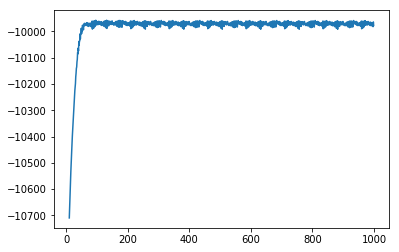

In [249]:
plt.plot(np.arange(10,1000), bpca.get_loglikelihood()[10:]);

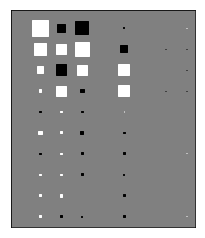

In [250]:
hinton(bpca.get_weight_matrix().T)

In [251]:
print(bpca.get_effective_dims())
print(bpca.get_inv_variance())

4
[219.20545419   0.31534094   0.75783194   0.40839311 219.20545419
   0.91254475 219.20545419 219.20545419 219.20545419]


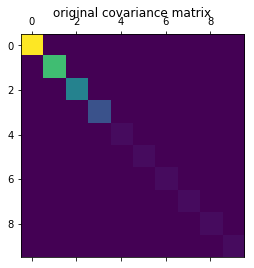

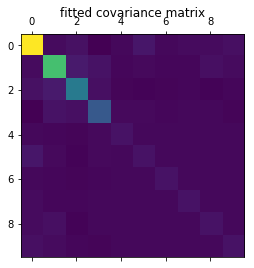

In [252]:
plt.matshow(cov);
plt.title('original covariance matrix')
plt.show()
plt.matshow(bpca.get_cov_mat());
plt.title('fitted covariance matrix')
plt.show()

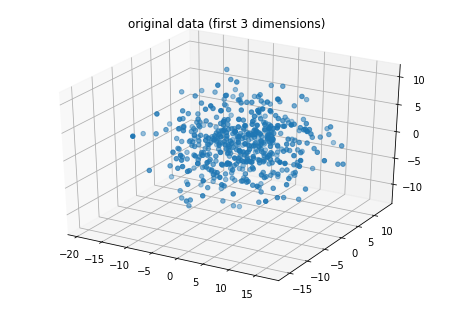

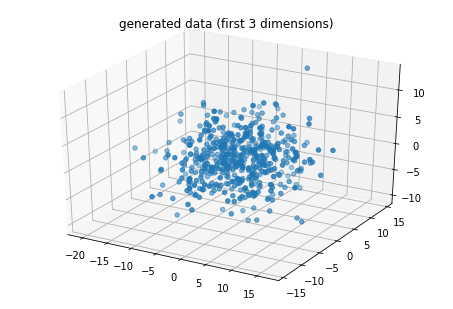

MSE in every dim: [72.96928656 46.9367667  29.39497485 21.20980801  1.90512059  1.92129905
  1.84239341  1.82343167  2.16419643  2.05371161]


In [253]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(data[:, 0], data[:, 1], data[:, 2]);
plt.title('original data (first 3 dimensions)')
plt.show()
fig = plt.figure()
ax = Axes3D(fig)
gene = bpca.generate(500)
ax.scatter(gene[:, 0], gene[:, 1], gene[:, 2]);
plt.title('generated data (first 3 dimensions)')
plt.show()
print("MSE in every dim: " + str(np.mean((data-gene)**2, axis=0)))

## MNIST

In [264]:
from sklearn import datasets as data
mnist = data.load_digits()
Y = mnist.target
X = mnist.images
X = X.reshape(len(X),-1)
bpca = BPCA()
bpca.fit(X, iters=5000, verbose=True, print_every=1000)

Iter 0, LL: 0.000000, alpha: [  35.36474893   28.59819252  928.87705115   26.96499456   19.02353094
   31.07253005   73.11609203 2201.7566004    31.38219329  123.59935868
   26.12958261  149.89981174   40.37125986  839.99805768 1013.53696505
   48.09565825   46.97227258 1434.55843602   17.19539937   21.09065413
   26.87459387   64.00319378   26.29072385   33.42573845   43.16980451
   27.58184617  262.94137605   19.37082109   57.49468874   70.70030191
   41.57320903  181.65725474   18.93907674   20.71594464   35.20744643
   98.98378016   78.08874127  683.36975834   23.03669284  152.16235765
   29.88624022   31.80993147   96.73551241   99.11800839   18.81300323
   92.64521623   22.97437027   25.9499316    47.39625971   95.49345646
   10.63841016   28.46241178   61.80923953   23.46698836   22.360104
   32.1626362  2004.11789766   59.1827973    18.55770577   13.40175309
   21.97118187 1815.35721449  781.07111382]
Iter 1000, LL: 0.000000, alpha: [   4.96637561   14.81595256 2889.43598446   

In [265]:
bpca.get_effective_dims()

13

In [273]:
from sklearn.decomposition import PCA
from ppca import PPCA
pca = PCA(n_components=bpca.get_effective_dims())
new_X_pca = pca.inverse_transform(pca.fit_transform(X))
ppca = PPCA(n_dimension=bpca.get_effective_dims())
ppca.fit(X, method='EM')
new_X_ppca = ppca.inverse_transform(ppca.transform(X))
new_X_bpca = bpca.inv_transform(bpca.transform())

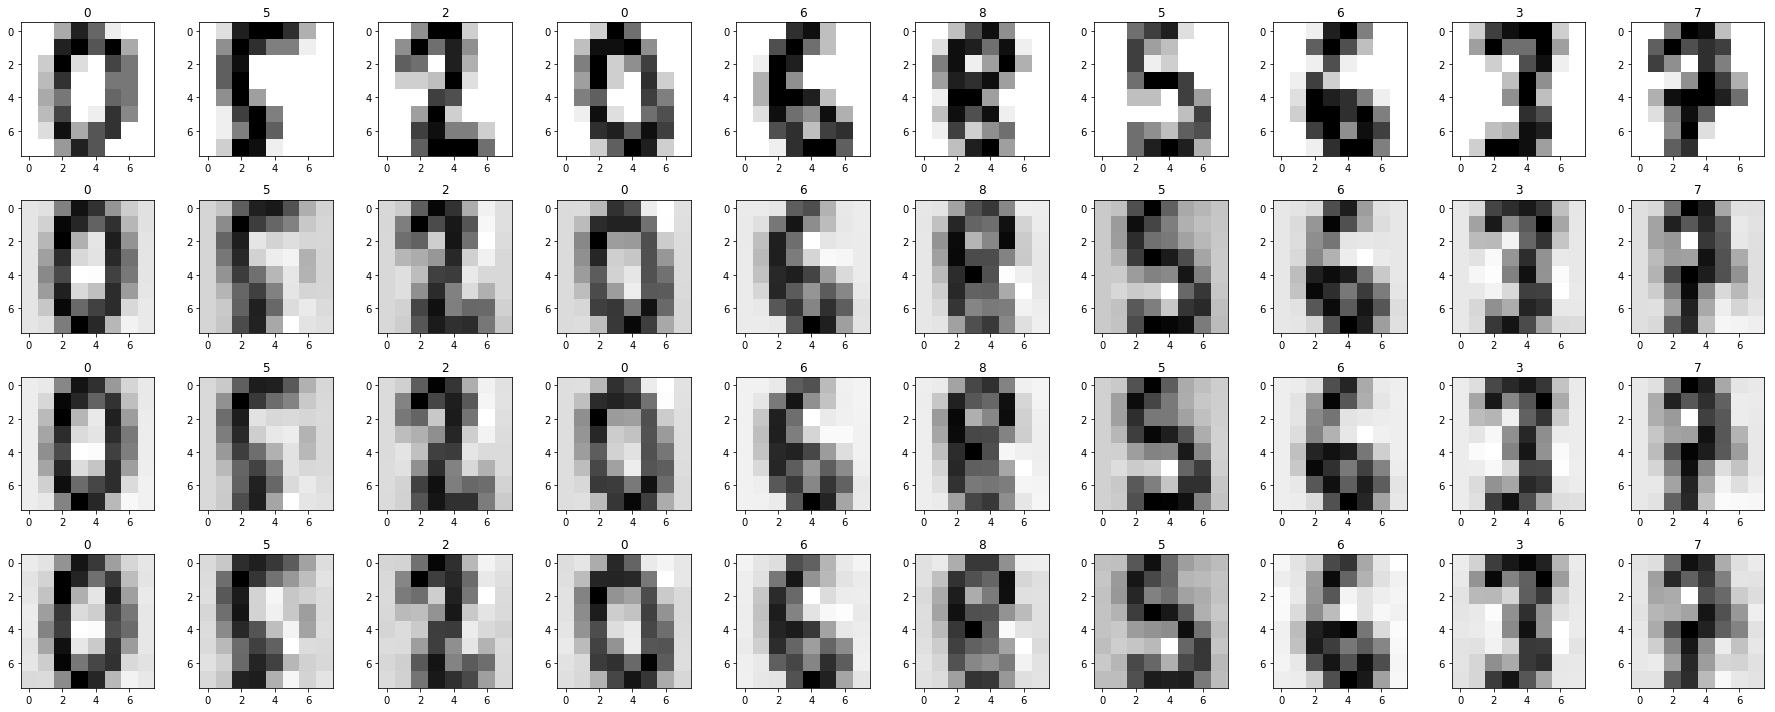

In [274]:
plt.figure(figsize=(25,10))
for i in range(10):
    plt.subplot(4,10,i+1, title=str(mnist.target[i*155]))
    plt.imshow(mnist.images[i*155], cmap=plt.cm.gray_r, interpolation='nearest')
    plt.subplot(4,10,i+11, title=str(mnist.target[i*155]))
    plt.imshow(new_X_pca[i*155].reshape(8,8), cmap=plt.cm.gray_r, interpolation='nearest')
    plt.subplot(4,10,i+21, title=str(mnist.target[i*155]))
    plt.imshow(new_X_ppca[i*155].reshape(8,8), cmap=plt.cm.gray_r, interpolation='nearest')
    plt.subplot(4,10,i+31, title=str(mnist.target[i*155]))
    plt.imshow(new_X_bpca[i*155].reshape(8,8), cmap=plt.cm.gray_r, interpolation='nearest')
plt.tight_layout()
plt.show()

In [275]:
print(pca.score(X))
print(ppca._calc_loglike(X, X.mean(axis=0))/X.shape[0])
print(bpca.calculate_log_likelihood()/X.shape[0])

-156.44450133682284
-156.44423670751183
-183.5487723496488


In [216]:
for i in np.arange(0.99,0,-0.01):
    pca = PCA(i)
    dim = pca.fit_transform(X).shape[1]
    print('%d dims keep %d percent variance'%(dim, i*100))
    if dim == bpca.get_effective_dims():
        break

41 dims keep 99 percent variance
37 dims keep 98 percent variance
34 dims keep 97 percent variance
31 dims keep 96 percent variance
29 dims keep 95 percent variance
27 dims keep 94 percent variance
25 dims keep 93 percent variance
24 dims keep 92 percent variance
22 dims keep 90 percent variance
21 dims keep 89 percent variance
20 dims keep 88 percent variance
19 dims keep 87 percent variance
18 dims keep 86 percent variance
17 dims keep 85 percent variance
17 dims keep 84 percent variance
16 dims keep 83 percent variance
15 dims keep 82 percent variance
14 dims keep 81 percent variance
14 dims keep 80 percent variance
13 dims keep 79 percent variance
